<a href="https://colab.research.google.com/github/Mpho-AI/Sunspots-and-flares/blob/main/BDV_ASS2_Sunspots_and_flares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
!pip install statsmodels



In [3]:
flares_df = pd.read_excel('flares1981-2017.xlsx')
sunspots_df = pd.read_excel('Sunspots.xlsx')


### Sunspots

In [ ]:
sunspots_df.shape

In [ ]:
sunspots_df.isna().sum()

In [6]:
sunspots_df= sunspots_df.drop_duplicates()

sunspots_df.duplicated().sum()

0

In [7]:
# Clean and convert 'NOAA' column to numeric
sunspots_df['NOAA'] = pd.to_numeric(sunspots_df['NOAA'], errors='coerce')



In [ ]:
sunspots_df.dropna(inplace = True)
sunspots_df.shape

In [9]:
sunspots_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225958 entries, 0 to 271882
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Date                     225958 non-null  datetime64[ns]
 1   Time                     225958 non-null  int64         
 2   NOAA                     225958 non-null  float64       
 3   McIntosh Classification  225958 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.6+ MB


In [10]:
# Display first few rows of the flares data
#print("Flares Data:")
#print(flares_df.head())

# Display first few rows of the sunspots data
print("\nSunspots Data:")
print(sunspots_df.head())



Sunspots Data:
        Date  Time    NOAA McIntosh Classification
0 1981-12-01    21  3478.0                     EKI
1 1981-12-01   115  3478.0                     EHI
2 1981-12-01   210  3478.0                     EHO
3 1981-12-01  1355  3478.0                     EHI
4 1981-12-01  1535  3478.0                     EHI


In [11]:
sunspots_df['NOAA'].nunique()

8649

In [12]:
sunspots_df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 225958 entries, 0 to 271882
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Date                     225958 non-null  datetime64[ns]
 1   Time                     225958 non-null  int64         
 2   NOAA                     225958 non-null  float64       
 3   McIntosh Classification  225958 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 8.6+ MB


             Date  Time    NOAA McIntosh Classification
0      1981-12-01    21  3478.0                     EKI
1      1981-12-01   115  3478.0                     EHI
2      1981-12-01   210  3478.0                     EHO
3      1981-12-01  1355  3478.0                     EHI
4      1981-12-01  1535  3478.0                     EHI
...           ...   ...     ...                     ...
271878 2017-06-29   525  2664.0                     CSO
271879 2017-06-29  1549  2664.0                     CSO
271880 2017-06-30   104  2664.0                     CSO
271881 2017-06-30   553  2664.0                     HSX
271882 2017-06-30  1614  2664.0                     HAX

[225956 rows x 4 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


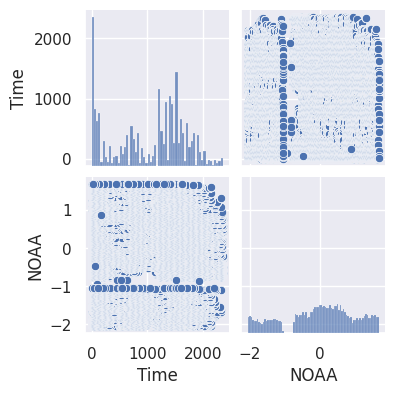

In [13]:

# Assuming 'sunspots_df' is your DataFrame
sunspots_df = sunspots_df[(sunspots_df['NOAA'] <= 20000) & (sunspots_df['Time'] <= 7000)].copy()

# Display the modified DataFrame
print(sunspots_df)

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize the 'NOAA' column
sunspots_df['NOAA'] = scaler.fit_transform(sunspots_df[['NOAA']])
#sunspots_df['Time'] = scaler.fit_transform(sunspots_df[['Time']])

# Plot pairwise relationships
sns.set()
sns.pairplot(sunspots_df, size=2.0)
plt.show()


In [14]:


# Assuming df is your DataFrame
# Drop rows with missing values in 'McIntosh Classification'
df = sunspots_df.dropna(subset=['McIntosh Classification'])

# Create a new DataFrame with unique 'McIntosh Classification' values
unique_mcintosh = df[['McIntosh Classification']].drop_duplicates()

# Assign an index to each unique classification
unique_mcintosh['index'] = range(len(unique_mcintosh))

# Merge the unique classification indices back into the original DataFrame
df = pd.merge(df, unique_mcintosh, on='McIntosh Classification', how='inner')


In [ ]:
# Create a TSV file for embedding
embedding_filename = 'mcintosh_embedding.tsv'
unique_mcintosh.to_csv(embedding_filename, sep='\t', header=False, index=False)

# Create a metadata file with the 'McIntosh Classification'
metadata_filename = 'mcintosh_metadata.tsv'
unique_mcintosh[['index', 'McIntosh Classification']].to_csv(metadata_filename, sep='\t', header=False, index=False)


In [ ]:
# Load your DataFrame
# Assuming df is your DataFrame
# Drop rows with missing values for simplicity
df = sunspots_df.dropna(subset=['NOAA'])

# Select relevant numerical features
features = df[['Time', 'NOAA']]

# Standardize the numerical features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)


In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_standardized)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()


In [ ]:
# Choose the optimal K based on the elbow method (e.g., K=3)
optimal_k = 10

# Fit K-means model
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
sunspots_df['Cluster'] = kmeans.fit_predict(features_standardized)


In [ ]:
# Visualize the clusters
plt.scatter(sunspots_df['Time'], sunspots_df['NOAA'], c=sunspots_df['Cluster'], cmap='viridis')
plt.title('K-means Clustering of Sunspots')
plt.xlabel('Time')
plt.ylabel('NOAA')
plt.show()


In [ ]:


# Assuming df is your DataFrame
# Drop rows with missing values for clustering
df_cluster = df.dropna(subset=['Time', 'NOAA'])

# Standardize the numerical columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster[['Time', 'NOAA']])

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
df_cluster['Cluster'] = clustering.fit_predict(df_scaled)

# Dendrogram for hierarchical clustering
linkage_matrix = linkage(df_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=10)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Cluster Distance')
plt.show()

# Display the clustered DataFrame
print("Clustered DataFrame:")
print(df_cluster.head())


### Flares


In [ ]:
flares_df = flares_df.drop_duplicates()
flares_df.duplicated().sum()

In [16]:
flares_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71687 entries, 0 to 71983
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         71687 non-null  datetime64[ns]
 1   Year         71687 non-null  int64         
 2   month        71687 non-null  int64         
 3   Day          71687 non-null  int64         
 4   TIME         71687 non-null  int64         
 5   type         71660 non-null  object        
 6   og_num       21 non-null     float64       
 7   og-num2      71657 non-null  float64       
 8   type_num     71657 non-null  float64       
 9   Satelite     71687 non-null  object        
 10  unknown      38499 non-null  float64       
 11  NOAA         21107 non-null  object        
 12  Unnamed: 12  4183 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 7.7+ MB


In [ ]:
flares_df.isnull().sum()

In [18]:
flares_df['type'] = flares_df['type'].fillna(method='bfill')
#df['type 2'] = df['type 2'].fillna(method='ffill')
flares_df['Day'] = flares_df['Day'].fillna(method='ffill')

flares_df['type'].unique()


array(['C', 'M', 'X', 'B', 'A'], dtype=object)

In [19]:
# Clean and convert 'NOAA' column to numeric
flares_df['NOAA'] = pd.to_numeric(flares_df['NOAA'], errors='coerce')

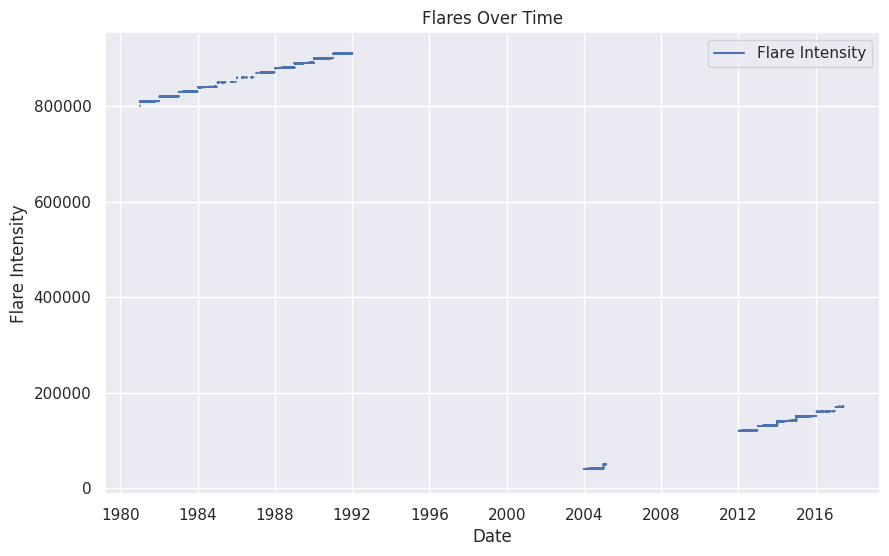

In [20]:
# Line plot for flares over time
plt.figure(figsize=(10, 6))

plt.plot(flares_df['DATE'], flares_df['NOAA'], label='Flare Intensity')
plt.title('Flares Over Time')
plt.xlabel('Date')
plt.ylabel('Flare Intensity')
plt.legend()
plt.show()


### MERGED DF

In [21]:
merged_df = pd.merge(flares_df, sunspots_df, left_on='DATE', right_on='Date', how='inner')


In [22]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1630479 entries, 0 to 1630478
Data columns (total 17 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   DATE                     1630479 non-null  datetime64[ns]
 1   Year                     1630479 non-null  int64         
 2   month                    1630479 non-null  int64         
 3   Day                      1630479 non-null  int64         
 4   TIME                     1630479 non-null  int64         
 5   type                     1630479 non-null  object        
 6   og_num                   759 non-null      float64       
 7   og-num2                  1630011 non-null  float64       
 8   type_num                 1630011 non-null  float64       
 9   Satelite                 1630479 non-null  object        
 10  unknown                  961971 non-null   float64       
 11  NOAA_x                   455216 non-null   float64       
 12  

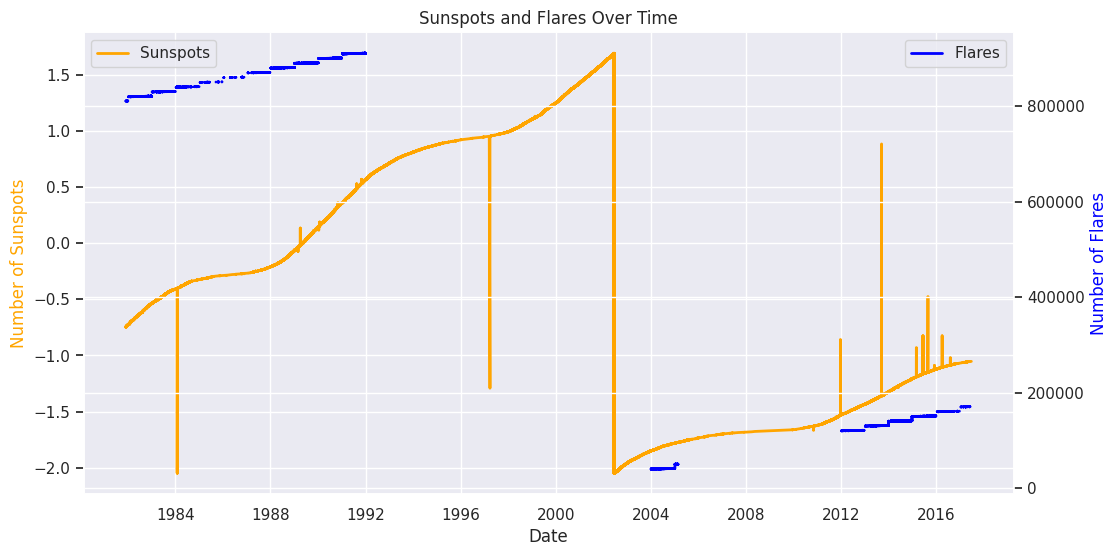

In [23]:


# Assuming merged_df is your merged dataframe
sns.set(style="darkgrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot sunspots
ax1.plot(merged_df['DATE'], merged_df['NOAA_y'], color='orange', label='Sunspots', linewidth=2)

# Create a second y-axis for flares
ax2 = ax1.twinx()
ax2.plot(merged_df['DATE'], merged_df['NOAA_x'], color='blue', label='Flares', linewidth=2)

# Set labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Sunspots', color='orange')
ax2.set_ylabel('Number of Flares', color='blue')
plt.title('Sunspots and Flares Over Time')

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()


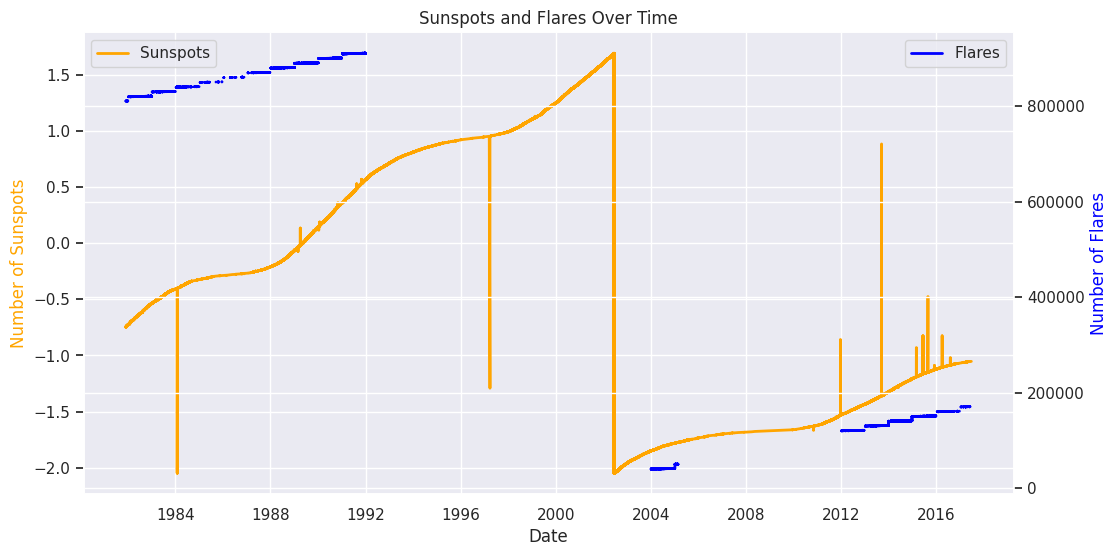

In [24]:


# Assuming merged_df is your merged dataframe
sns.set(style="darkgrid")

# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot sunspots
ax1.plot(merged_df['DATE'], merged_df['NOAA_y'], color='orange', label='Sunspots', linewidth=2)

# Create a second y-axis for flares
ax2 = ax1.twinx()
ax2.plot(merged_df['DATE'], merged_df['NOAA_x'], color='blue', label='Flares', linewidth=2)

# Set labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of Sunspots', color='orange')
ax2.set_ylabel('Number of Flares', color='blue')
plt.title('Sunspots and Flares Over Time')

# Show legend
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()


In [ ]:
# for exploration in Tableau
merged_df.to_csv('output_merged_sunspots_and_flares.csv', index=False)

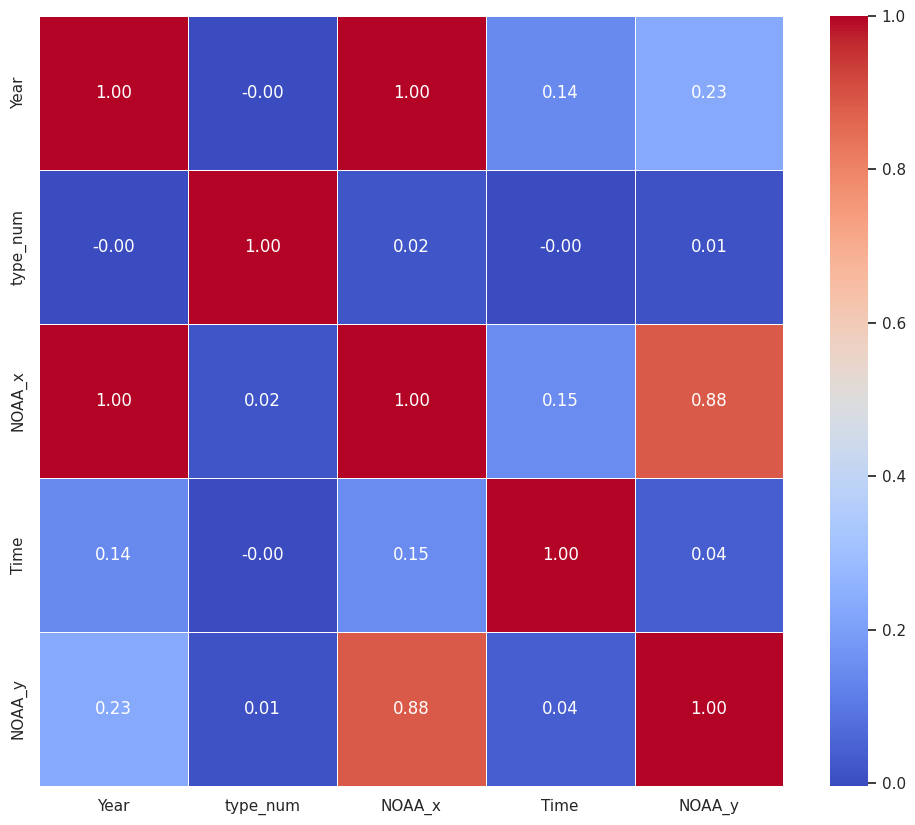

In [25]:
columns_for_heatmap = ['Year', 'type_num', 'NOAA_x', 'Time', 'NOAA_y']

# Create a subset DataFrame with selected columns
heatmap_data = merged_df[columns_for_heatmap]

# Create a correlation matrix
correlation_matrix = heatmap_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Display the heatmap
plt.show()

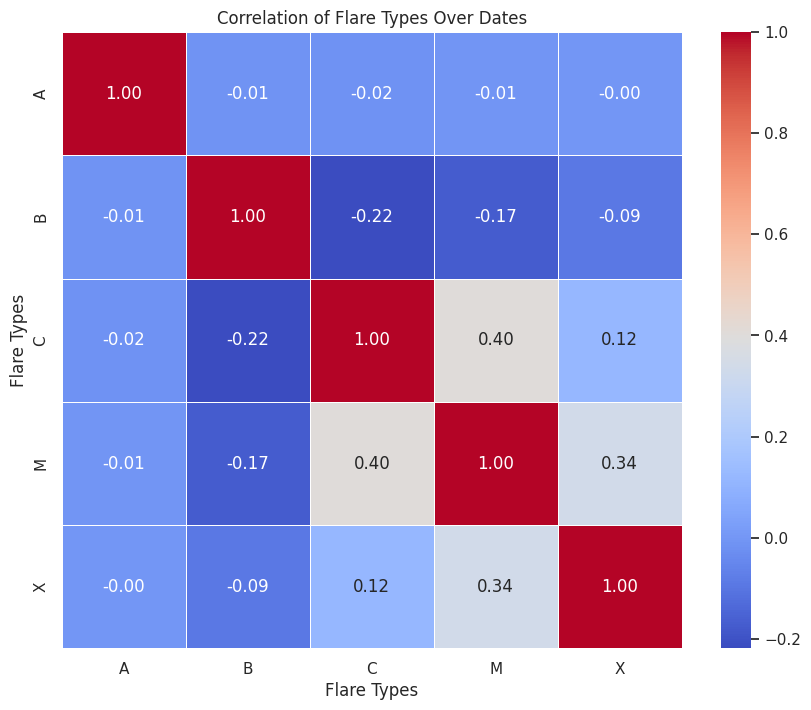

In [26]:
# Filter the DataFrame to include only rows where the 'type' column is not null
filtered_df = merged_df.dropna(subset=['type'])

# Create a pivot table to count occurrences of each flare type for each date
flare_type_counts = filtered_df.groupby(['DATE', 'type']).size().unstack(fill_value=0)

# Create a correlation matrix for the flare types
flare_type_correlation = flare_type_counts.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap using seaborn
sns.heatmap(flare_type_correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

# Set labels and title
plt.xlabel('Flare Types')
plt.ylabel('Flare Types')
plt.title('Correlation of Flare Types Over Dates')

# Display the heatmap
plt.show()

In [27]:
from scipy.stats import chi2_contingency
filtered_df = merged_df.dropna(subset=['type', 'McIntosh Classification'])

# Create a contingency table
contingency_table = pd.crosstab(filtered_df['type'], filtered_df['McIntosh Classification'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Display the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

# Interpret the results
alpha = 0.05
print("Significance level:", alpha)
print("Is there a significant association between 'type' and 'McIntosh Classification'?")
if p < alpha:
    print("Yes, there is a significant association.")
else:
    print("No, there is no significant association.")

Chi-squared value: 72307.7507112516
P-value: 0.0
Significance level: 0.05
Is there a significant association between 'type' and 'McIntosh Classification'?
Yes, there is a significant association.


<ipython-input-36-5420758cb46c>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-5420758cb46c>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-5420758cb46c>:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-36-5420

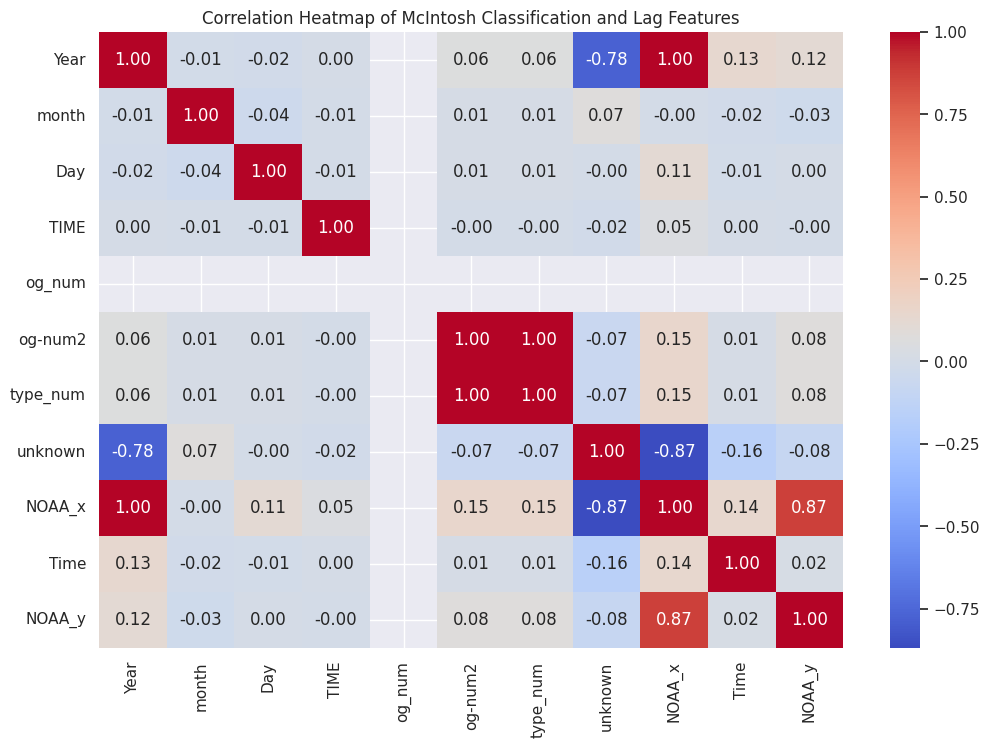

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values in the relevant columns
df = merged_df.dropna(subset=['McIntosh Classification', 'type'])

# Filter DataFrame to include only 'C' type flares
df_c = df[df['type'] == 'C']

# Define the lag window (you can adjust this based on your analysis)
lag_window = 5

# Create lag features for 'McIntosh Classification'
for i in range(1, lag_window + 1):
    df_c[f'McIntosh_{i}'] = df_c['McIntosh Classification'].shift(i)

# Plot a heatmap to visualize the correlation between McIntosh Classification and its lag features
plt.figure(figsize=(12, 8))
sns.heatmap(df_c.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of McIntosh Classification and Lag Features')
plt.show()


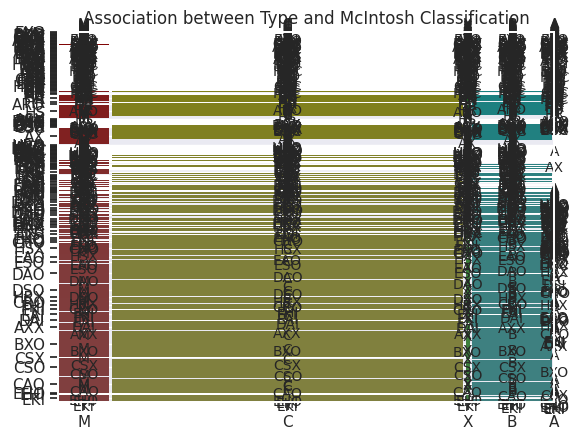

In [28]:
from statsmodels.graphics.mosaicplot import mosaic

# Filter the DataFrame to include only rows where both 'type' and 'McIntosh Classification' are not null
filtered_df = merged_df.dropna(subset=['type', 'McIntosh Classification'])

# Create a mosaic plot
mosaic(filtered_df, ['type', 'McIntosh Classification'], title='Association between Type and McIntosh Classification')

# Display the plot
plt.show()

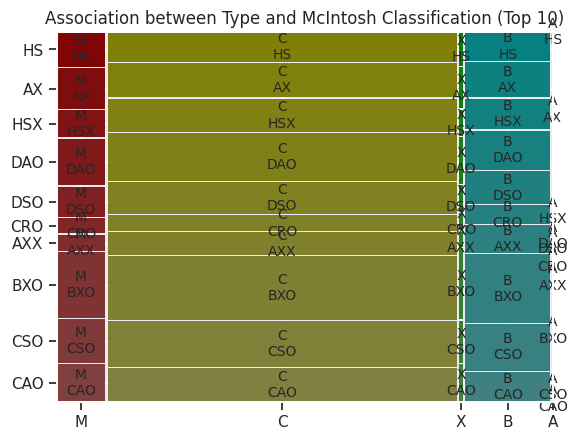

In [29]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

# Filter the DataFrame to include only rows where both 'type' and 'McIntosh Classification' are not null
filtered_df = merged_df.dropna(subset=['type', 'McIntosh Classification'])

# Set a threshold p-value for significance
alpha = 0.05

# Create a contingency table
contingency_table = pd.crosstab(filtered_df['type'], filtered_df['McIntosh Classification'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Check if the association is significant
if p < alpha:
    # Select the top 10 most frequent McIntosh classifications
    top_10_classifications = contingency_table.sum(axis=0).nlargest(10).index

    # Filter the DataFrame to include only the top 10 classifications
    filtered_df = filtered_df[filtered_df['McIntosh Classification'].isin(top_10_classifications)]

    # Create a mosaic plot for the top 10 classifications
    mosaic(filtered_df, ['type', 'McIntosh Classification'], title='Association between Type and McIntosh Classification (Top 10)')

    # Display the plot
    plt.show()
else:
    print("No significant association found.")


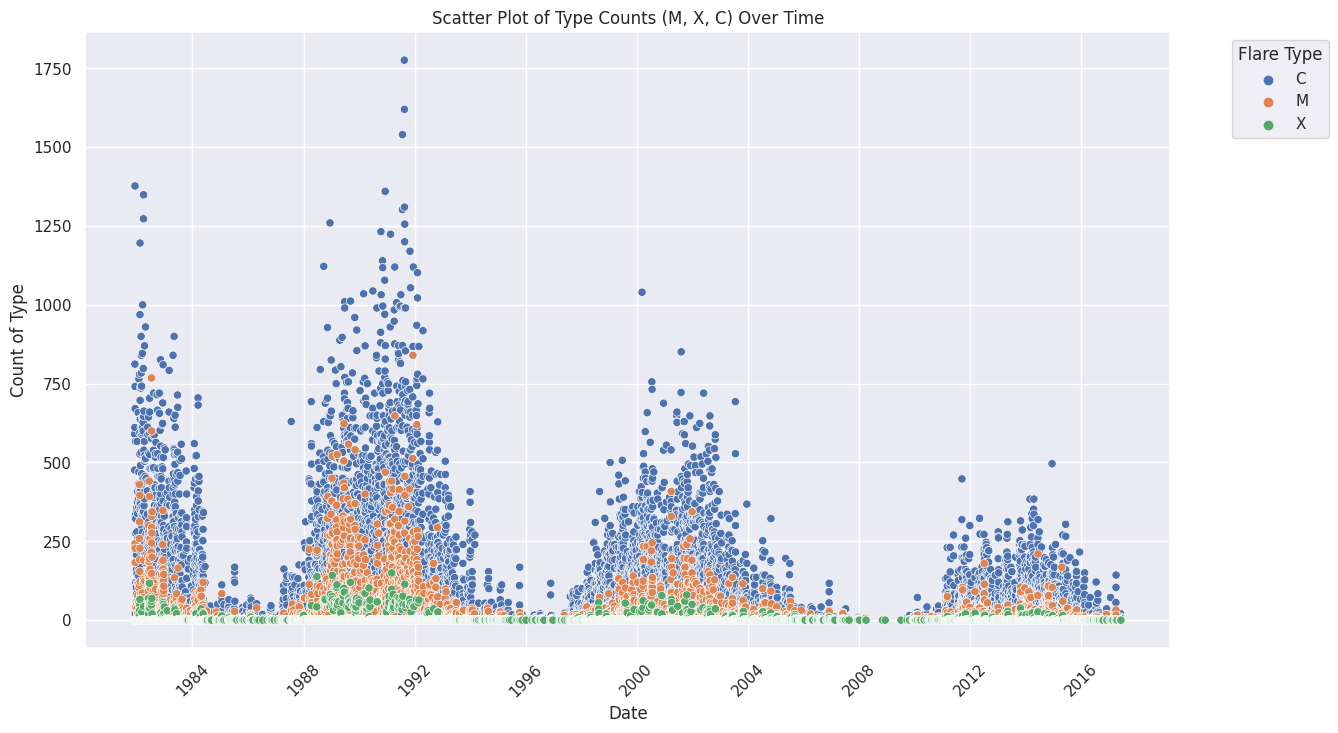

In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Drop rows with missing values in the relevant columns
df = merged_df.dropna(subset=['type', 'DATE'])

# Filter DataFrame to include only types 'M', 'X', and 'C'
selected_types = ['M', 'X', 'C']
df_filtered = df[df['type'].isin(selected_types)]

# Group by date and count occurrences of each type
type_counts = df_filtered.groupby(['DATE', 'type']).size().unstack(fill_value=0)

# Flatten the DataFrame for plotting
type_counts = type_counts.reset_index()

# Plot scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x='DATE', y='Count', hue='type', data=type_counts.melt(id_vars=['DATE'], var_name='type', value_name='Count'))
plt.title('Scatter Plot of Type Counts (M, X, C) Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Type')
plt.xticks(rotation=45)
plt.legend(title='Flare Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


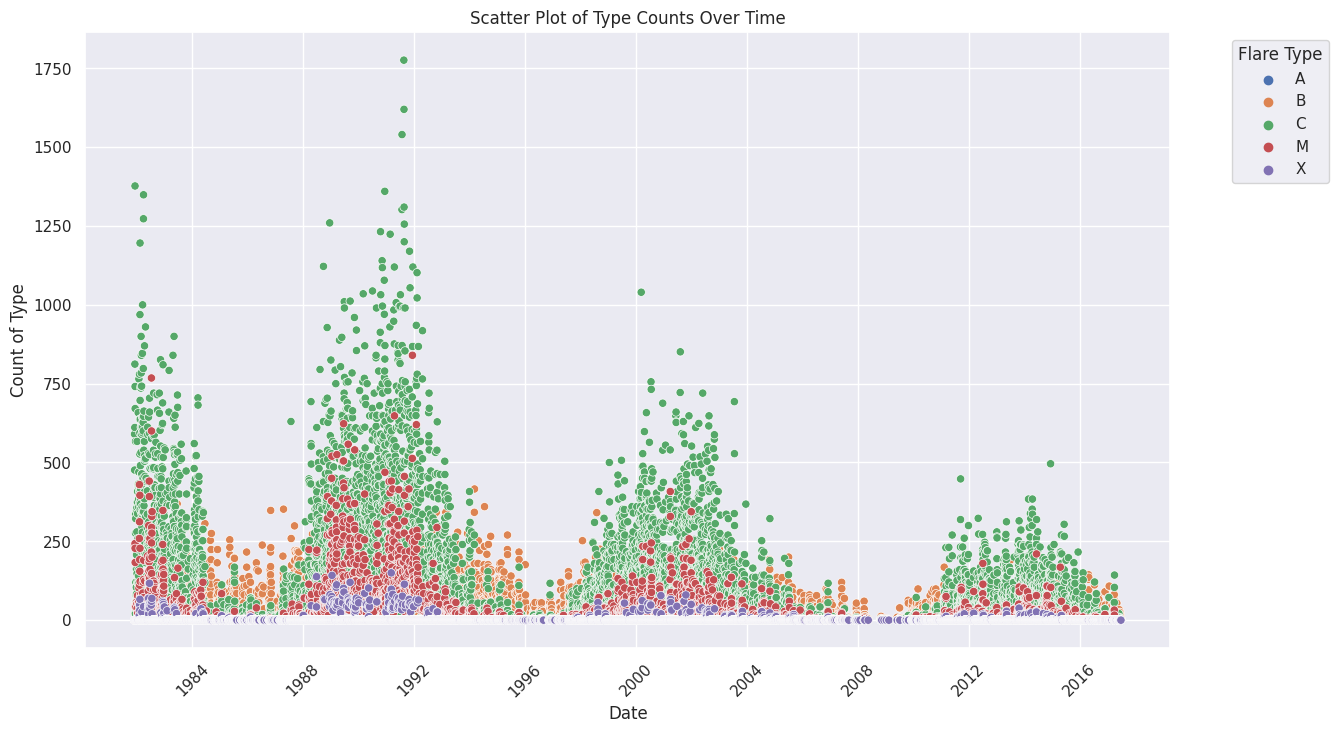

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Drop rows with missing values in the relevant columns
df = merged_df.dropna(subset=['type', 'DATE'])

# Group by date and count occurrences of each type
type_counts = df.groupby(['DATE', 'type']).size().unstack(fill_value=0)

# Flatten the DataFrame for plotting
type_counts = type_counts.reset_index()

# Plot scatter plot
plt.figure(figsize=(14, 8))
sns.scatterplot(x='DATE', y='Count', hue='type', data=type_counts.melt(id_vars=['DATE'], var_name='type', value_name='Count'))
plt.title('Scatter Plot of Type Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Type')
plt.xticks(rotation=45)
plt.legend(title='Flare Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


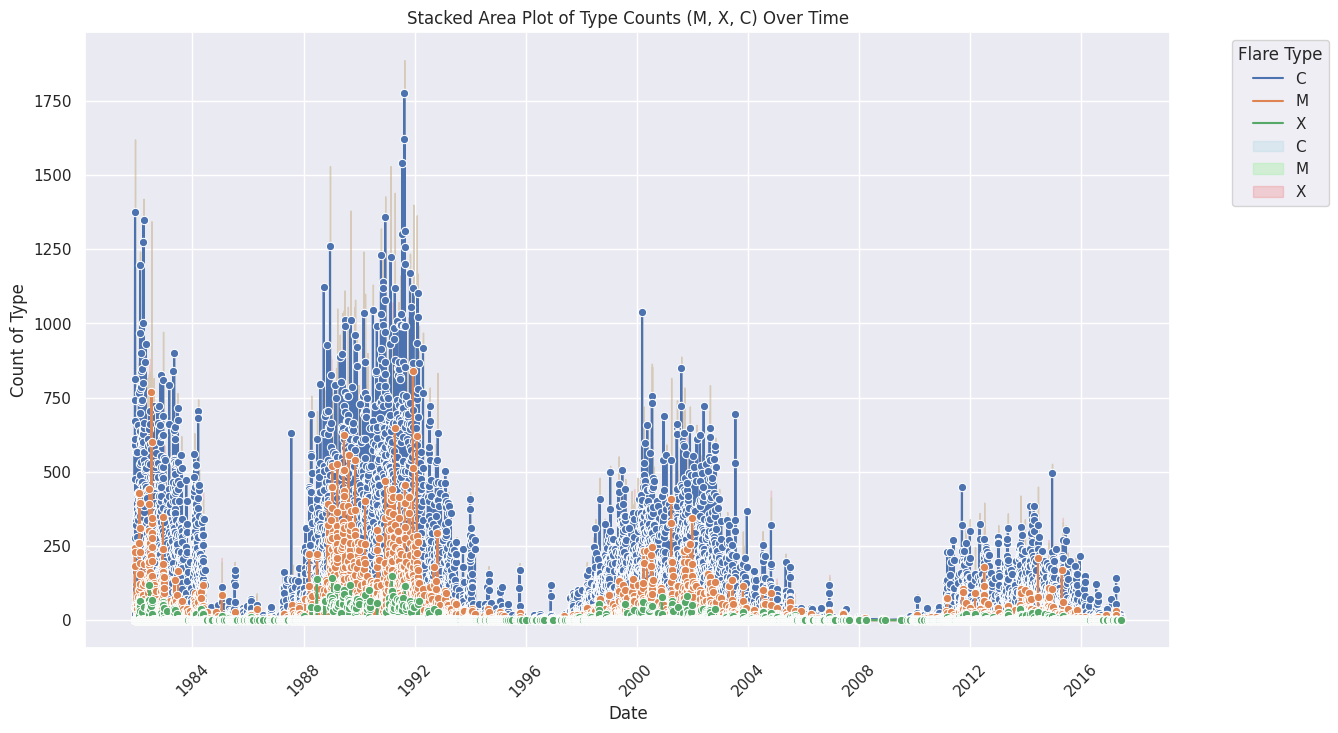

In [41]:
plt.figure(figsize=(14, 8))
sns.lineplot(x='DATE', y='Count', hue='type', data=type_counts.melt(id_vars=['DATE'], var_name='type', value_name='Count'), marker="o")
plt.fill_between(type_counts['DATE'], type_counts['C'], color='lightblue', alpha=0.3, label='C')
plt.fill_between(type_counts['DATE'], type_counts['C'] + type_counts['M'], color='lightgreen', alpha=0.3, label='M')
plt.fill_between(type_counts['DATE'], type_counts['C'] + type_counts['M'] + type_counts['X'], color='lightcoral', alpha=0.3, label='X')

plt.title('Stacked Area Plot of Type Counts (M, X, C) Over Time')
plt.xlabel('Date')
plt.ylabel('Count of Type')
plt.xticks(rotation=45)
plt.legend(title='Flare Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd


# Drop rows with missing values in the relevant columns
df = merged_df.dropna(subset=['type', 'DATE'])

# Filter DataFrame to include only types 'M', 'X', and 'C'
selected_types = ['M', 'X', 'C']
df_filtered = df[df['type'].isin(selected_types)]

# Group by date and count occurrences of each type
type_counts = df_filtered.groupby(['DATE', 'type']).size().unstack(fill_value=0)

# Flatten the DataFrame for plotting
type_counts = type_counts.reset_index()

# Plot scatter plot using Plotly Express
fig = px.scatter(type_counts.melt(id_vars=['DATE'], var_name='type', value_name='Count'),
                 x='DATE', y='Count', color='type', title='Scatter Plot of Type Counts (M, X, C) Over Time',
                 labels={'Count': 'Count of Type', 'DATE': 'Date'}, template='plotly_dark')

# Customize x-axis date formatting
fig.update_xaxes(type='category')
fig.update_layout(xaxis=dict(tickangle=45))

# Show the plot
fig.show()


Accuracy: 0.9590294785995456

Classification Report:
               precision    recall  f1-score   support

           A       1.00      0.75      0.86         4
           B       0.97      0.98      0.97     20308
           C       0.97      0.98      0.98    141666
           M       0.89      0.88      0.89     28054
           X       0.76      0.69      0.72      2277

    accuracy                           0.96    192309
   macro avg       0.92      0.86      0.88    192309
weighted avg       0.96      0.96      0.96    192309



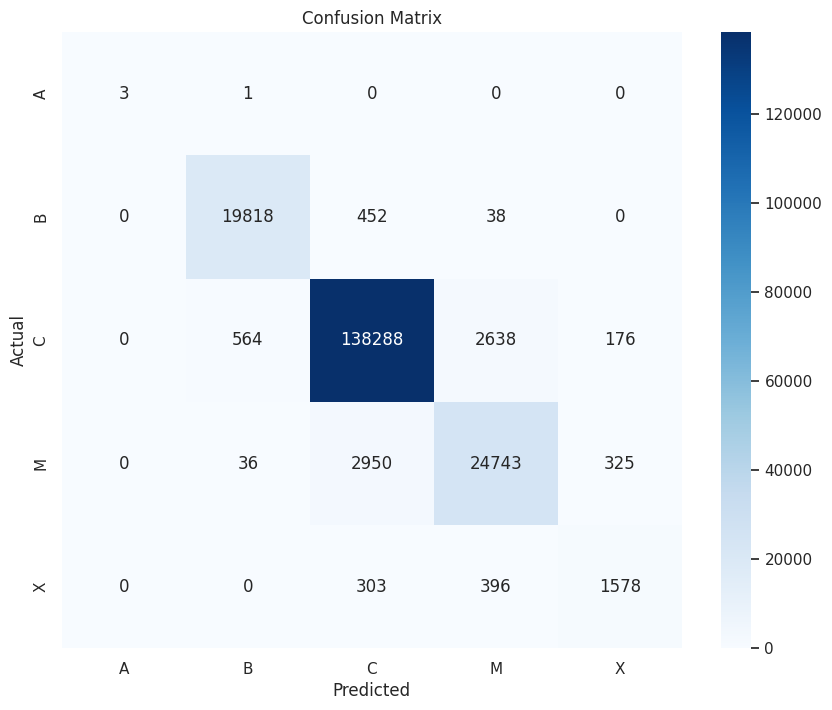

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Drop rows with missing values in the relevant columns
df = merged_df.dropna(subset=['type', 'type_num', 'unknown'])

# Select relevant features and target variable
X = df[['type_num', 'unknown']]
y = df['type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the k-Nearest Neighbors model (you can adjust the n_neighbors parameter)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the performance of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Drop rows with missing values in the relevant columns
df = merged_df.dropna(subset=['NOAA_x', 'type'])

# Filter DataFrame to include only 'M' type flares
df_m = df[df['type'] == 'M']

# Define the lag window (you can adjust this based on your analysis)
lag_window = 5

# Create lag features for 'NOAA_x'
for i in range(1, lag_window + 1):
    df_m[f'NOAA_x_{i}'] = df_m['NOAA_x'].shift(i)

# Plot a heatmap to visualize the correlation between NOAA number and its lag features
plt.figure(figsize=(12, 8))
sns.heatmap(df_m.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of NOAA Number and Lag Features for M Type Flares')
plt.show()


Accuracy (Decision Tree): 0.9631790503824574

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           A       1.00      1.00      1.00         4
           B       0.98      0.98      0.98     20308
           C       0.97      0.98      0.98    141666
           M       0.91      0.87      0.89     28054
           X       0.83      0.67      0.74      2277

    accuracy                           0.96    192309
   macro avg       0.94      0.90      0.92    192309
weighted avg       0.96      0.96      0.96    192309



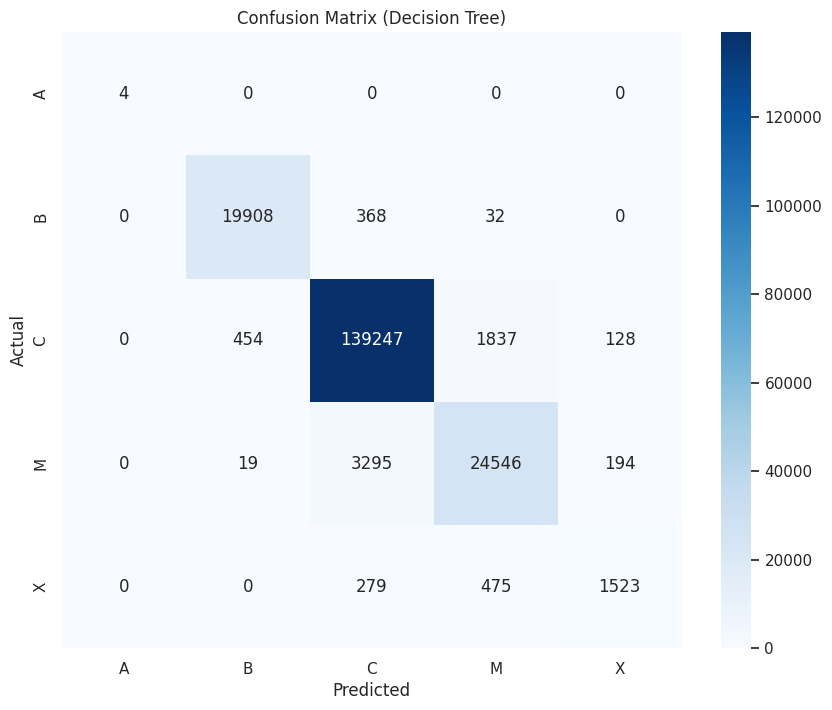

In [37]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the performance of the Decision Tree model
print("Accuracy (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report (Decision Tree):\n", classification_report(y_test, y_pred_dt))

# Create a confusion matrix for the Decision Tree model
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Display the confusion matrix using a heatmap for the Decision Tree model
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Decision Tree)')
plt.show()


Accuracy (Random Forest): 0.9632362499935

Classification Report (Random Forest):
               precision    recall  f1-score   support

           A       1.00      1.00      1.00         4
           B       0.98      0.98      0.98     20308
           C       0.97      0.98      0.98    141666
           M       0.91      0.88      0.89     28054
           X       0.82      0.67      0.74      2277

    accuracy                           0.96    192309
   macro avg       0.94      0.90      0.92    192309
weighted avg       0.96      0.96      0.96    192309



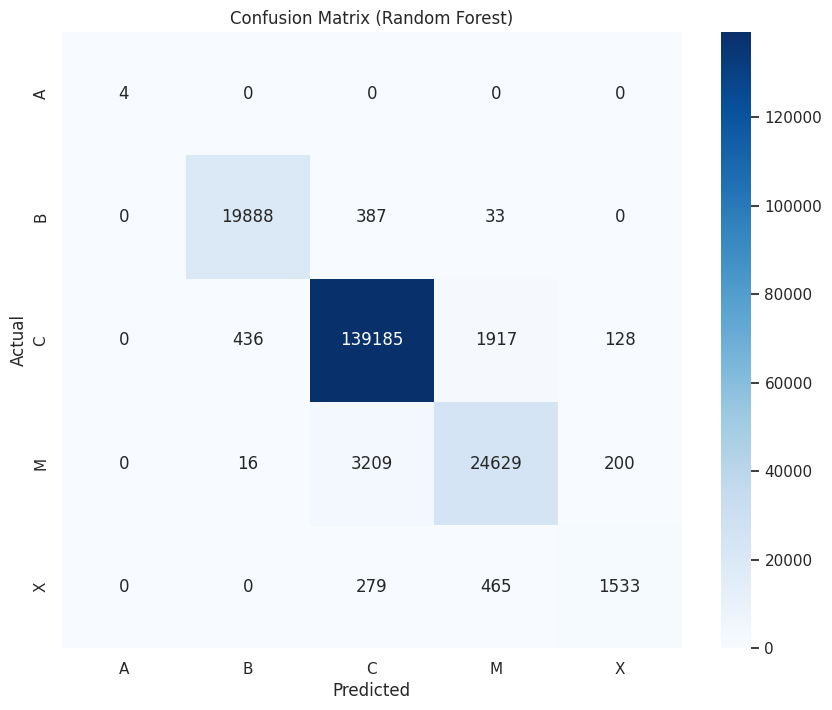

In [38]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance of the Random Forest model
print("Accuracy (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report (Random Forest):\n", classification_report(y_test, y_pred_rf))

# Create a confusion matrix for the Random Forest model
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# Display the confusion matrix using a heatmap for the Random Forest model
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score


df = merged_df.dropna(subset=['type', 'type_num', 'unknown'])

X = df[['type_num', 'unknown']]
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9631790503824574

Classification Report:
               precision    recall  f1-score   support

           A       1.00      1.00      1.00         4
           B       0.98      0.98      0.98     20308
           C       0.97      0.98      0.98    141666
           M       0.91      0.87      0.89     28054
           X       0.83      0.67      0.74      2277

    accuracy                           0.96    192309
   macro avg       0.94      0.90      0.92    192309
weighted avg       0.96      0.96      0.96    192309



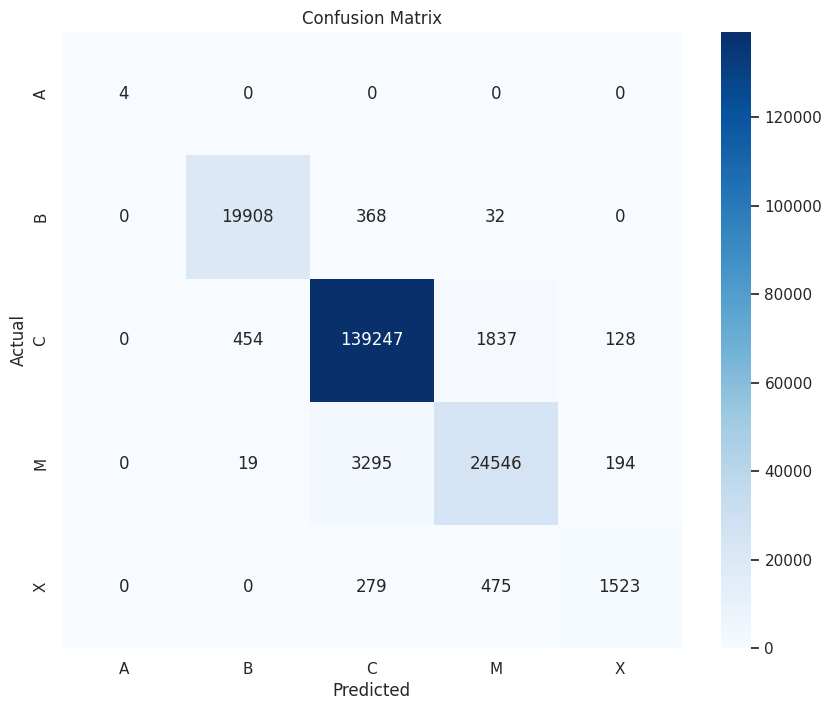

In [31]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()